# Analysis for Snail Lab

## Experimental Setup
We chose to measure the abundance of this snail spp. by taking a long transect and measureing 100 points (at random distances) along that transect. From those points we made three measurements using quadrats at random distances of up to 25m.

## Data Investigation

In [1]:
require(tidyverse)
require(nlme)
suppressWarnings(require(gridExtra))
require(ggpubr)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: ggpubr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
dat = read.csv("SnailSheet.csv")
head(dat)

,Date,PointTnum,DAlongTransect,QuadratNo,QuadratDist,SnailCount,Notes
,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>
1,2/26/20,1,0,Q1,7,4,
2,2/26/20,1,0,Q2,8,13,
3,2/26/20,1,0,Q3,10,13,
4,2/26/20,2,10,Q1,1,1,
5,2/26/20,2,10,Q2,3,4,
6,2/26/20,2,10,Q3,9,12,


In [3]:
# Estimate of abundance

mean(dat$SnailCount)*25*200

mean(dat$SnailCount)
sd(dat$SnailCount)

[1] 24050

[1] 4.81

[1] 8.197432

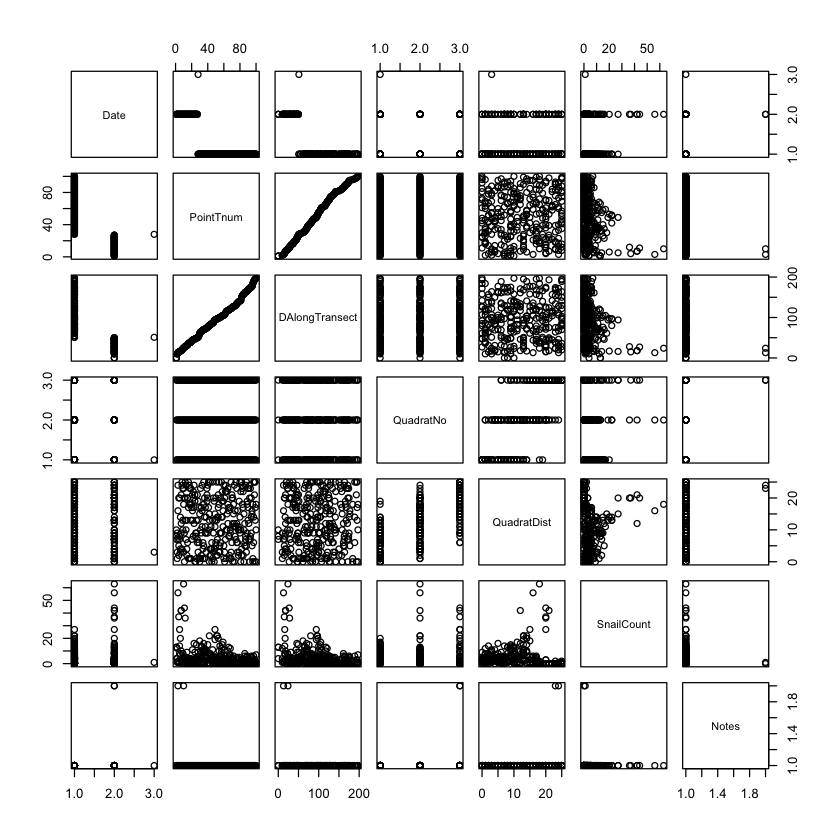

In [4]:
pairs(dat)

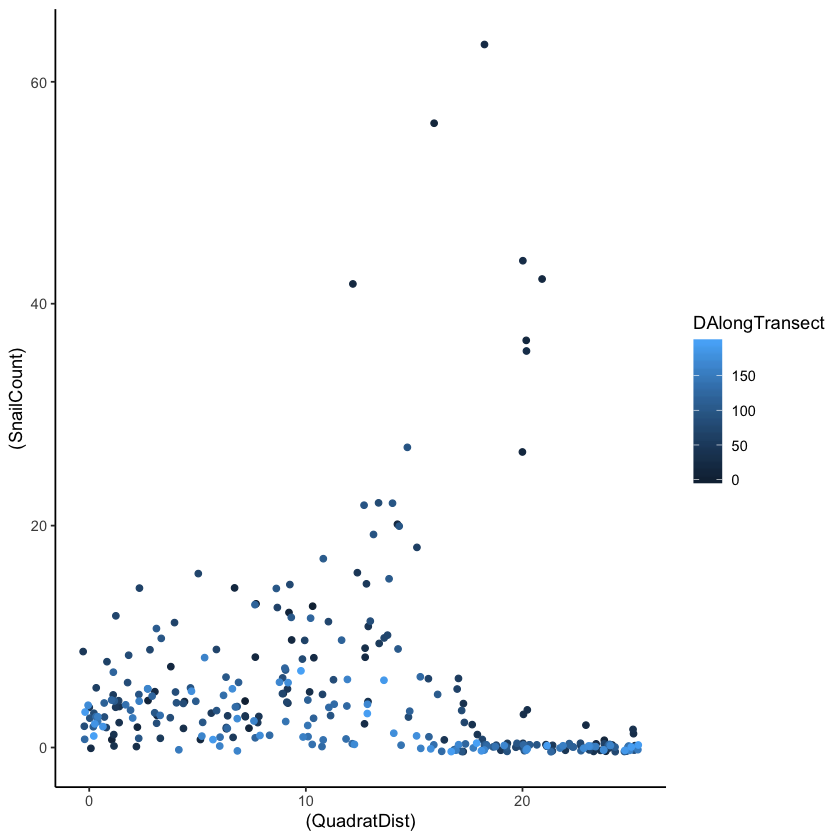

In [5]:
ggplot(dat, aes(x=(QuadratDist), y=(SnailCount), color=DAlongTransect)) +
    geom_point(position="jitter") + theme_classic()

In [6]:
linreg1 = lm(SnailCount ~ QuadratDist, data=dat)
linreg2 = lm(SnailCount ~ QuadratDist + DAlongTransect, data=dat)

In [7]:
AIC(linreg1); AIC(linreg2)

[1] 2116.288

[1] 2087.698


Call:
glm(formula = log1p(SnailCount) ~ log1p(QuadratDist) + DAlongTransect, 
    data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3904  -0.7327  -0.2008   0.6858   2.7687  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.561445   0.179506  14.269  < 2e-16 ***
log1p(QuadratDist) -0.346175   0.061009  -5.674 3.31e-08 ***
DAlongTransect     -0.006333   0.001057  -5.992 5.99e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8977113)

    Null deviance: 328.76  on 299  degrees of freedom
Residual deviance: 266.62  on 297  degrees of freedom
AIC: 823.98

Number of Fisher Scoring iterations: 2



	Shapiro-Wilk normality test

data:  resid(linreg3)
W = 0.96279, p-value = 5.877e-07


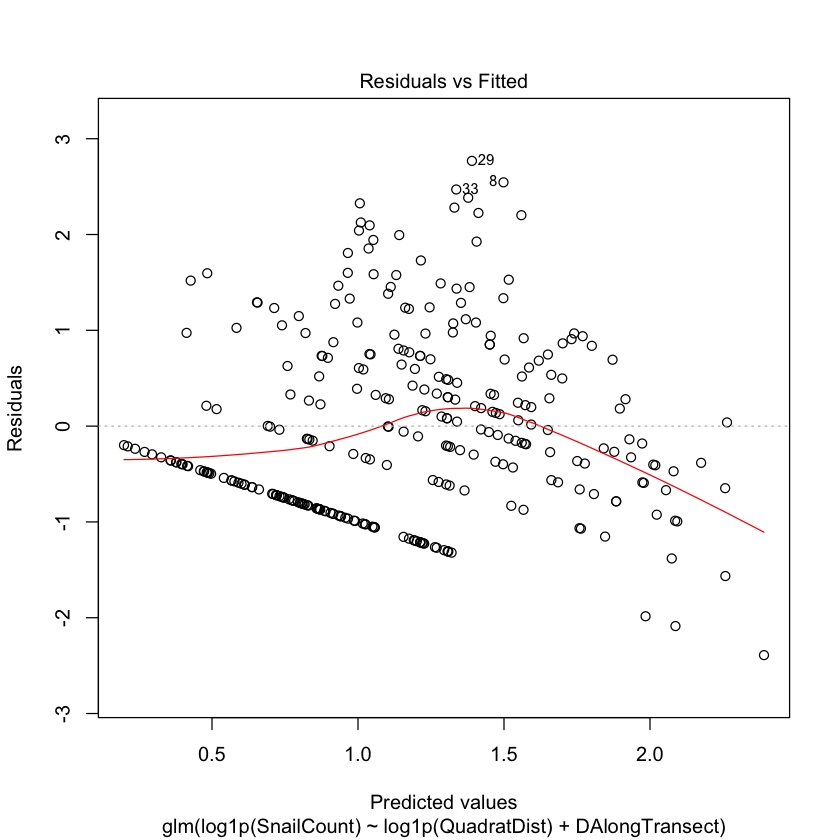

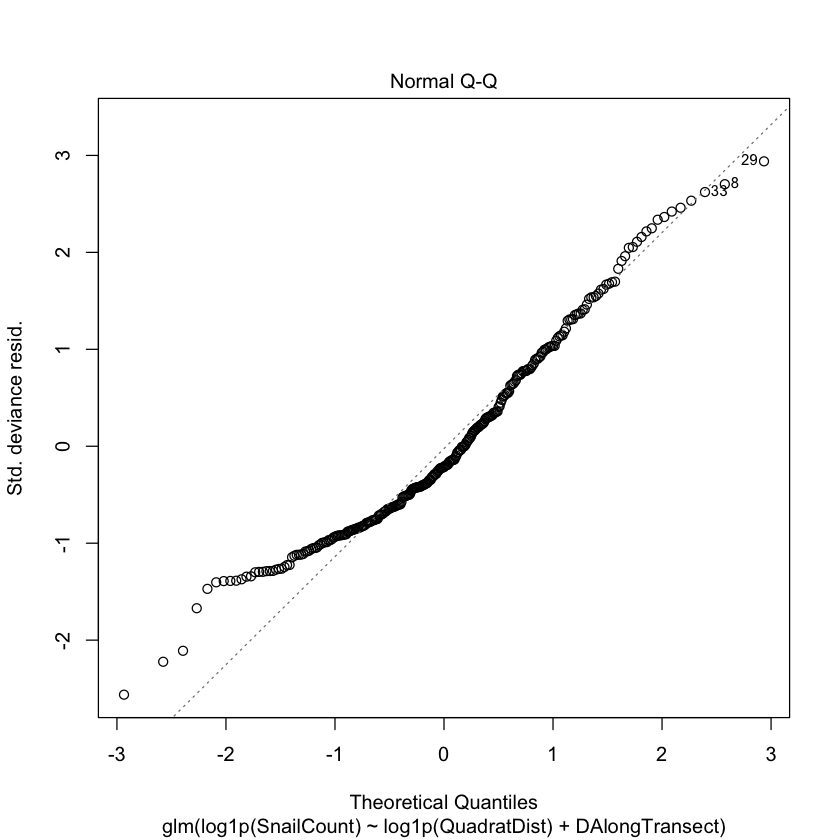

In [8]:
linreg3 = glm(log1p(SnailCount) ~ log1p(QuadratDist) + DAlongTransect, data=dat)
summary(linreg3)
shapiro.test(resid(linreg3))
plot(linreg3, c(1,2))

In [9]:
dat$distalong = dat$DAlongTransect + 1

Generalized least squares fit by REML
  Model: log1p(SnailCount) ~ log1p(QuadratDist) + distalong 
  Data: dat 
       AIC      BIC    logLik
  818.8817 837.3504 -404.4409

Variance function:
 Structure: Exponential of variance covariate
 Formula: ~distalong 
 Parameter estimates:
       expon 
-0.004172699 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         2.6797400 0.17667504 15.167620       0
log1p(QuadratDist) -0.4018018 0.05468932 -7.346988       0
distalong          -0.0061833 0.00098008 -6.308926       0

 Correlation: 
                   (Intr) l1(QD)
log1p(QuadratDist) -0.701       
distalong          -0.641 -0.019

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.0867698 -0.8444951 -0.2331137  0.6689109  2.6863609 

Residual standard error: 1.35006 
Degrees of freedom: 300 total; 297 residual

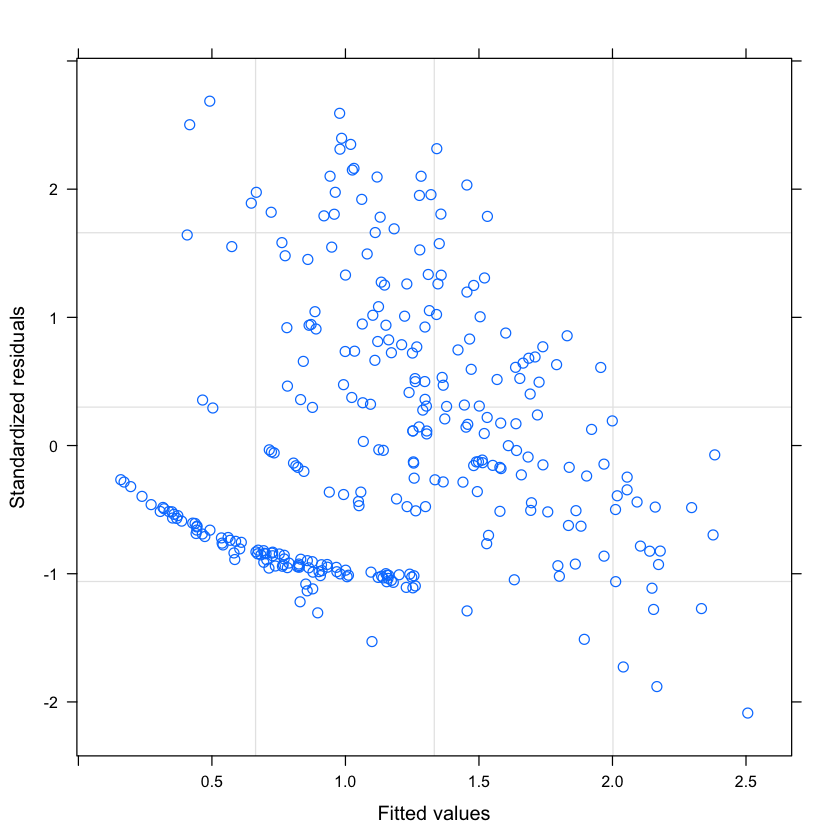

In [10]:
fitted.mod = gls(log1p(SnailCount) ~ log1p(QuadratDist) + distalong, data = dat, weights = varExp(form=~distalong))
summary(fitted.mod)
plot(fitted.mod)

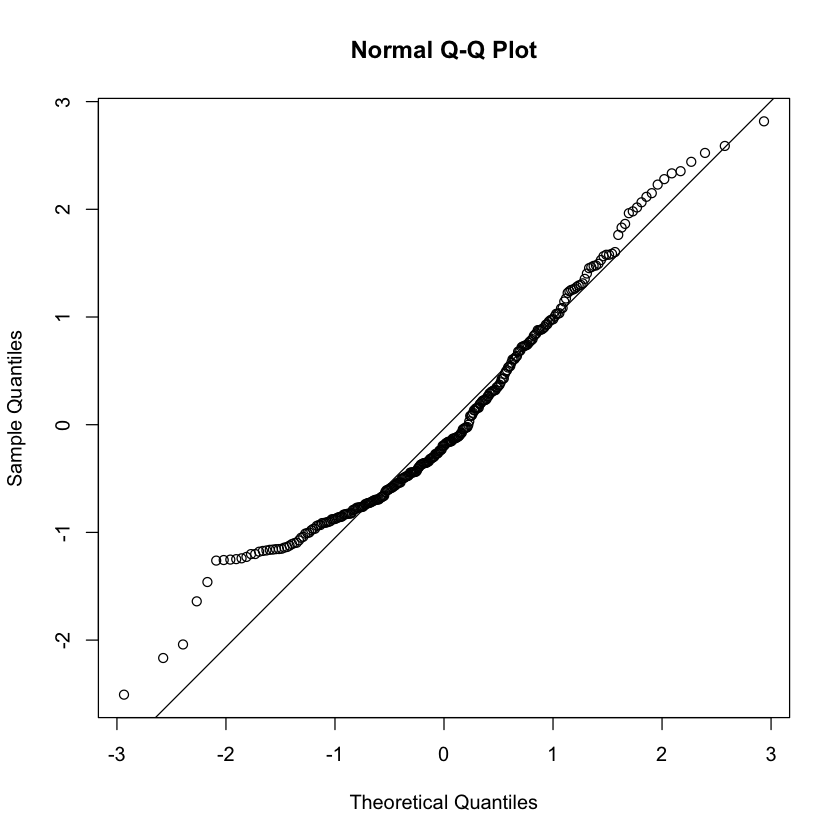

In [11]:
qqnorm(resid(fitted.mod)); qqline(resid(fitted.mod))

## A place for all of the plots I am making :P

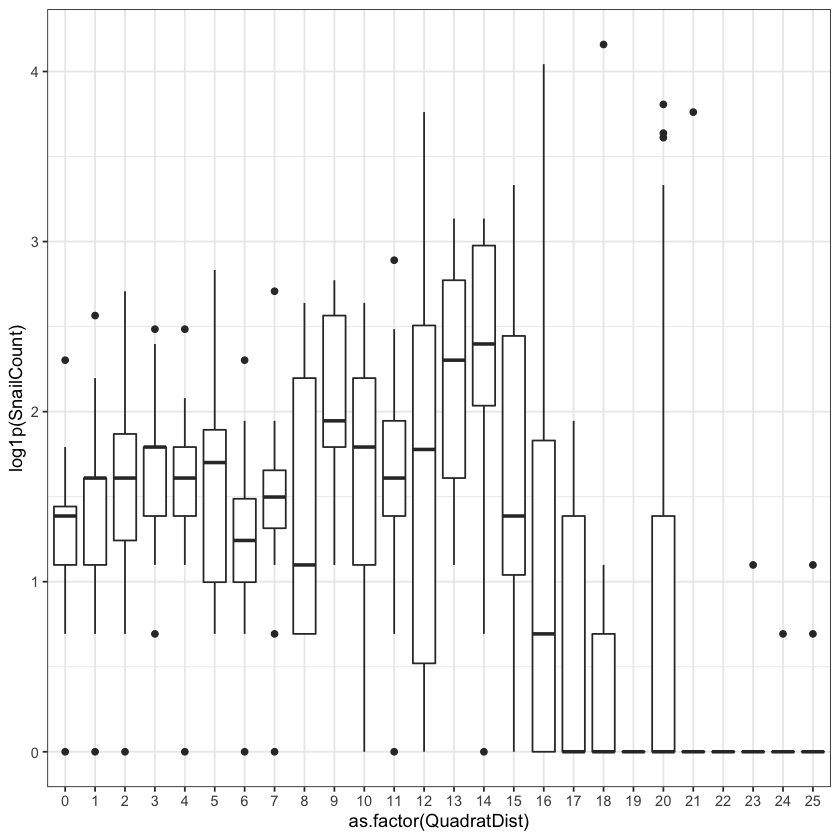

In [12]:
ggplot(dat, aes(x=as.factor(QuadratDist), y=log1p(SnailCount))) +
    geom_boxplot() + theme_bw()

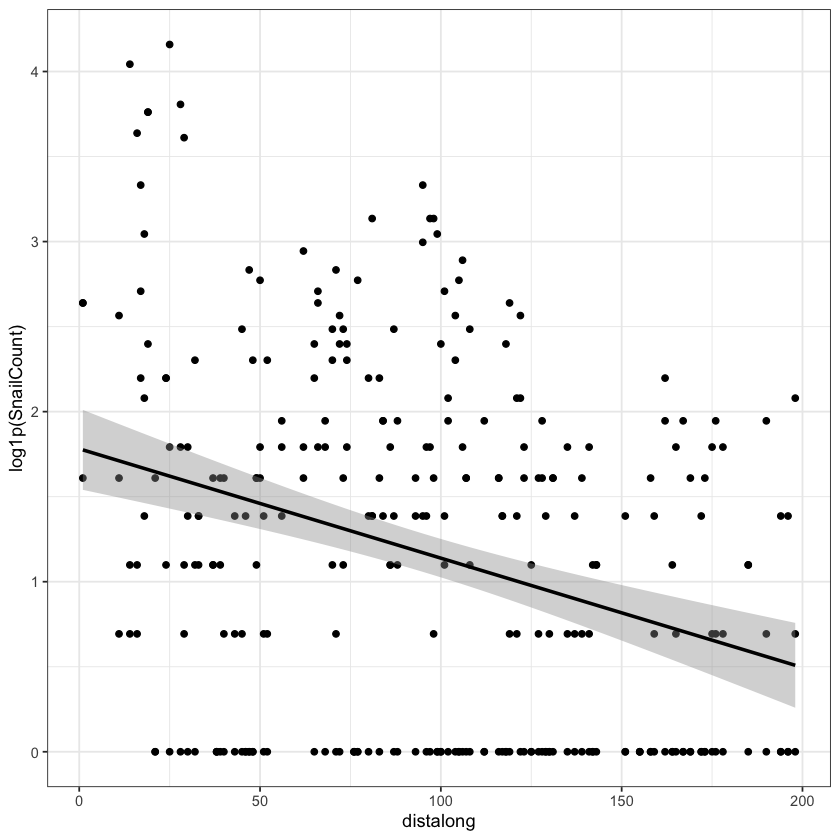

In [13]:
ggplot(dat, aes(x=distalong, y=log1p(SnailCount))) +
    geom_point() + theme_bw() + geom_smooth(method = "glm", color="black")

Saving 7 x 7 in image



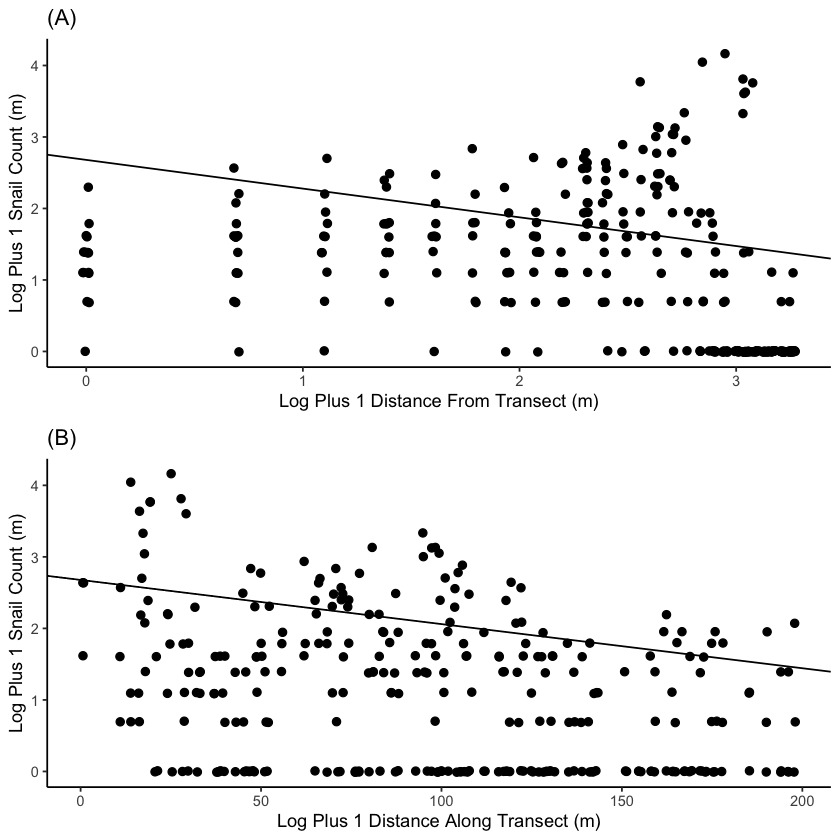

In [14]:
# Using the fitted model above

a = ggplot(data = dat, aes(x = log1p(QuadratDist), y = log1p(SnailCount))) +
    geom_point(position = "jitter", size = 2) + geom_abline(slope = -0.4018018, intercept = 2.6797400) + 
    theme_classic() + labs(x="Log Plus 1 Distance From Transect (m)", y="Log Plus 1 Snail Count (m)", title="(A)")

b = ggplot(data = dat, aes(x = distalong, y = log1p(SnailCount))) +
    geom_point(position = "jitter", size = 2) + geom_abline(slope = -0.0061833, intercept = 2.6797400) + 
    theme_classic() + labs(x="Log Plus 1 Distance Along Transect (m)", y="Log Plus 1 Snail Count (m)", title="(B)")
c = grid.arrange(a,b)
ggsave(c,file = "fig.png")

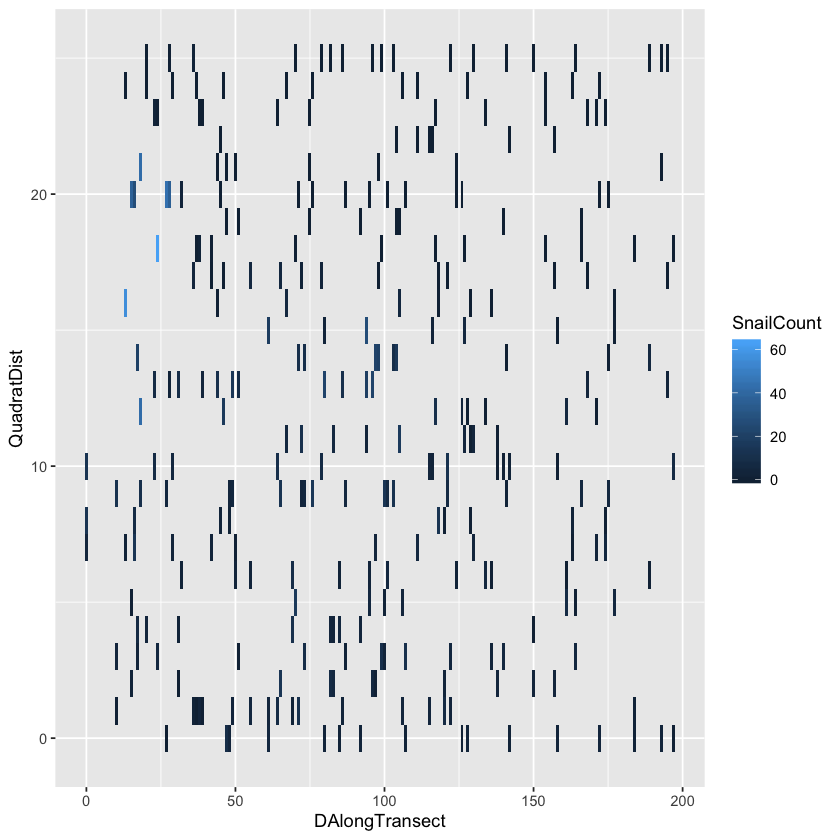

In [15]:
# That looks terrible hahaha

ggplot(dat, aes(DAlongTransect, QuadratDist, fill= SnailCount)) + 
  geom_tile()

Warning message:
“Computation failed in `stat_contour()`:
Contour requires single `z` at each combination of `x` and `y`.”


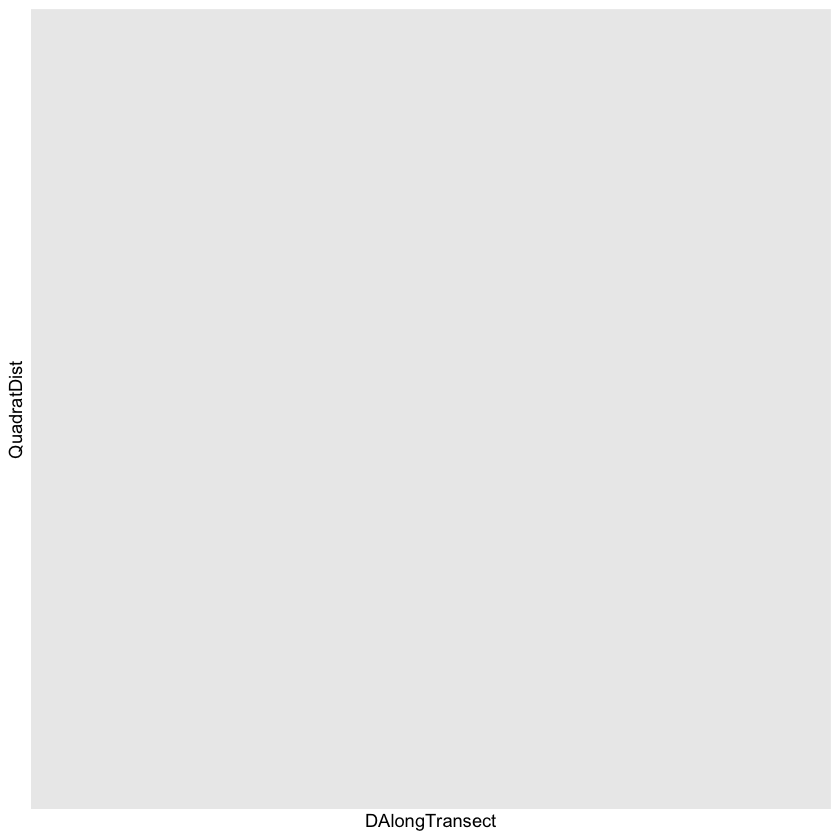

In [16]:
ggplot(data = dat, aes(x = DAlongTransect, y = QuadratDist,  z = SnailCount)) +
    stat_contour()